- 논리적으로 PostgreSQL은 XLOG 레코드를 8바이트(16ExaBytes) 길이의 가상 파일에 기록.

- 트랜잭션 로그 용량은 사실상 무제한이므로 8바이트의 주소 공간은 충분히 넓기 때문에 8바이트 용량의 파일을 처리하는 것은 불가능.
  - 따라서 PostgreSQL의 트랜잭션 로그는 기본적으로 16MB의 파일로 나누어지며, 각 파일은 WAL 세그먼트 라고 함

**WAL segment file size**

- 버전 11 이상에서는 initdb 명령으로 PostgreSQL 클러스터를 생성할 때 -wal-segsize 옵션을 사용하여 WAL 세그먼트 파일의 크기를 구성할 수 있음.

Transaction log and WAL segment files

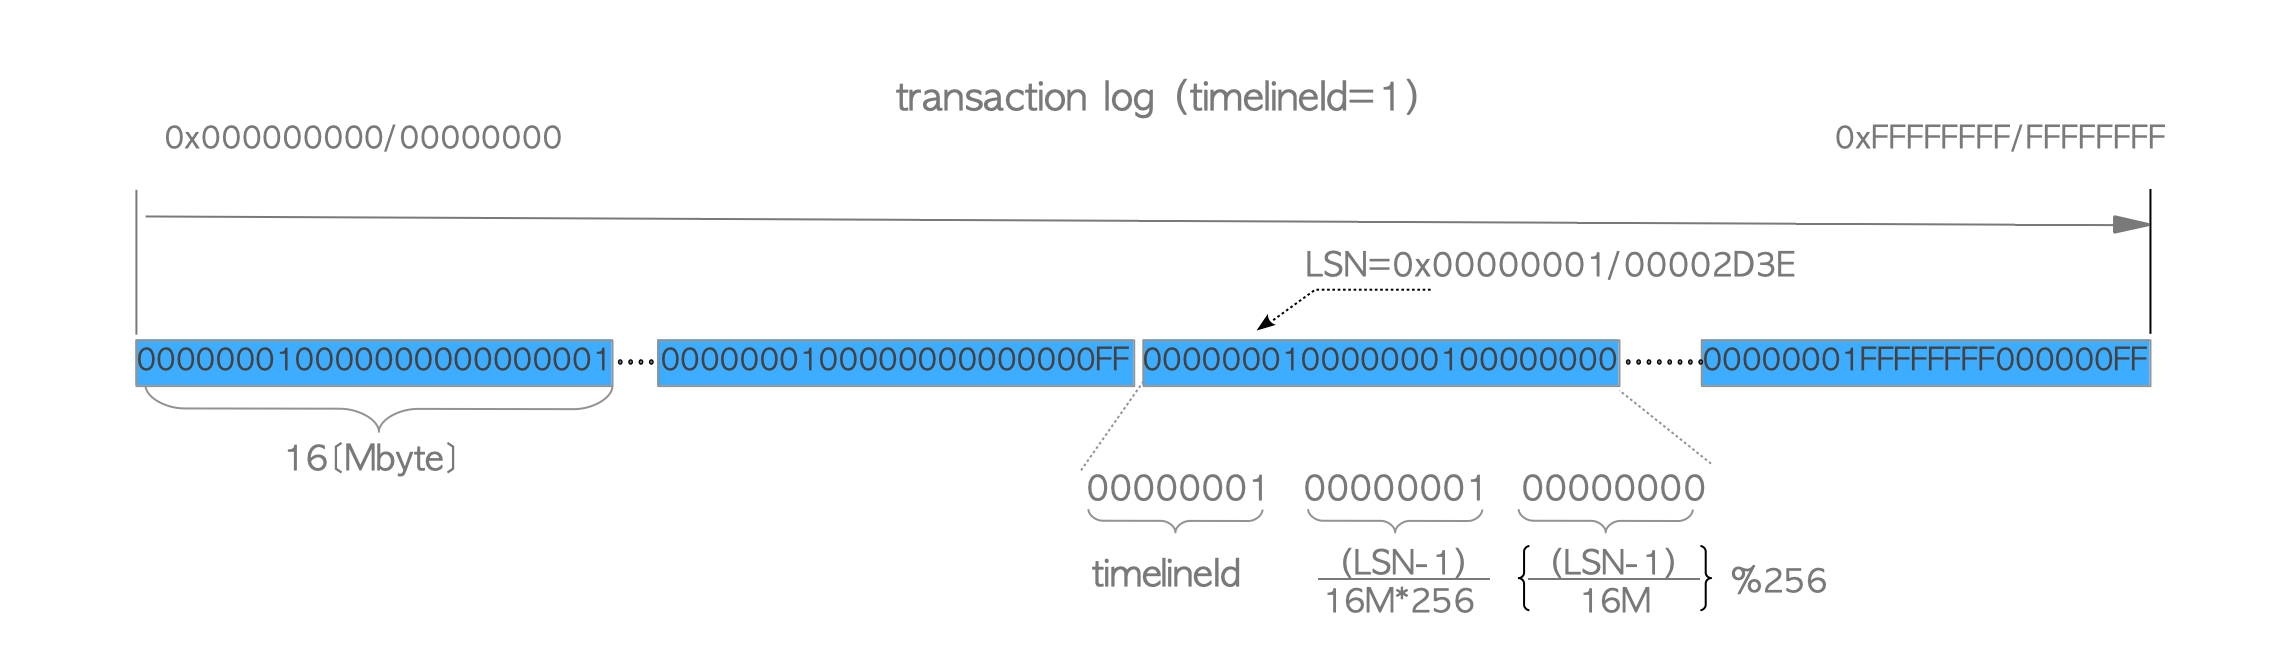

**WAL 세그먼트 파일 이름은 16진수 24자리 숫자이며 명명 규칙**

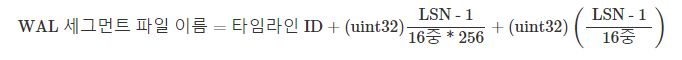

**timelineId**

- PostgreSQL의 WAL에는 10장 에서 설명한 PITR(Point-in-Time Recovery)을 위한 timelineId (4바이트 부호 없는 정수) 개념이 포함되어 있음
- 하지만 다음 설명에서는 이 개념이 필요하지 않기 때문에 이 장에서는 timelineId를 0x00000001로 고정.

1. 첫 번째 WAL 세그먼트 파일은 00000001 0000000 0000000 01
2. 첫 번째 항목이 XLOG 레코드 작성으로 채워졌다면 두 번째 항목은 00000001 00000000 000000 02가 제공됨.
3. 파일은 연속적으로 오름차순으로 사용됨.
4. 00000001 00000000 000000 FF 가 채워지면 다음 00000001 00000001 000000 00 이 제공됨.
5. 이런 식으로 마지막 2자리가 올 때마다 가운데 8자리 숫자가 1씩 증가함.

6. 마찬가지로 00000001 00000001 000000 FF 가 채워지면 00000001 00000002 000000 00이 제공되는 식.

**pg_xlogfile_name / pg_walfile_name**

- 내장 함수 pg_xlogfile_name (버전 9.6 이하) 또는 pg_walfile_name (버전 10 이상)을 사용하면 지정된 LSN이 포함된 WAL 세그먼트 파일 이름을 찾을 수 있음


```
testdb=# SELECT pg_xlogfile_name('1/00002D3E');  # In versions 10 or later, "SELECT pg_walfile_name('1/00002D3E');"
     pg_xlogfile_name     
--------------------------
 000000010000000100000000
(1 row)
```
